In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
data = pd.read_csv("Food_Inspections.csv")

In [3]:
data.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2571281,AFC SUSHI @ JEWEL OSCO #3349,AFC SUSHI @ JEWEL OSCO #3349,2841387.0,Shared Kitchen User (Long Term),Risk 1 (High),16915 N HAAS AVE,TORRANCE,CA,90504.0,2/15/2023,Canvass,Pass,NaN,NaN,NaN,NaN
1,2569647,Sauganash Elementary School,Sauganash Elementary School,25211.0,School,Risk 1 (High),6040 N Kilpatrick (4700W) AVE,CHICAGO,IL,60646.0,1/13/2023,Canvass,Pass,NaN,NaN,NaN,NaN
2,2569445,JERSEY MIKES,JERSEY MIKE'S,2886344.0,Restaurant,Risk 1 (High),6153 N BROADWAY,CHICAGO,IL,60660.0,1/10/2023,License,Not Ready,NaN,41.993854,-87.660239,"(41.99385357489393, -87.66023863563797)"
3,2568003,HOT DOG EXPRESS,HOT DOG EXPRESS (T2 E5),1909525.0,Restaurant,Risk 2 (Medium),11601 W TOUHY AVE,CHICAGO,IL,60666.0,12/5/2022,Canvass,Pass,NaN,42.008536,-87.914428,"(42.008536400868735, -87.91442843927047)"
4,2567972,SBARRO,SBARRO,2882176.0,Restaurant,Risk 1 (High),500 W MADISON ST,CHICAGO,IL,60661.0,12/5/2022,License,Not Ready,NaN,41.881994,-87.639759,"(41.88199433820508, -87.6397586848809)"


In [4]:
data.shape

(256789, 17)

In [5]:
data.columns

Index(['Inspection ID', 'DBA Name', 'AKA Name', 'License #', 'Facility Type',
       'Risk', 'Address', 'City', 'State', 'Zip', 'Inspection Date',
       'Inspection Type', 'Results', 'Violations', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256789 entries, 0 to 256788
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Inspection ID    256789 non-null  int64  
 1   DBA Name         256789 non-null  object 
 2   AKA Name         254306 non-null  object 
 3   License #        256781 non-null  float64
 4   Facility Type    251715 non-null  object 
 5   Risk             256710 non-null  object 
 6   Address          256789 non-null  object 
 7   City             256602 non-null  object 
 8   State            256736 non-null  object 
 9   Zip              256704 non-null  float64
 10  Inspection Date  256789 non-null  object 
 11  Inspection Type  256788 non-null  object 
 12  Results          256789 non-null  object 
 13  Violations       186733 non-null  object 
 14  Latitude         255911 non-null  float64
 15  Longitude        255911 non-null  float64
 16  Location         255911 non-null  obje

In [7]:
missing_values = data.isnull()
missing_counts = data.isnull().sum()
missing_percentage = (data.isnull().sum() / len(data)) * 100
print(missing_values)
print(missing_counts)
print(missing_percentage)

        Inspection ID  DBA Name  AKA Name  License #  Facility Type   Risk  \
0               False     False     False      False          False  False   
1               False     False     False      False          False  False   
2               False     False     False      False          False  False   
3               False     False     False      False          False  False   
4               False     False     False      False          False  False   
...               ...       ...       ...        ...            ...    ...   
256784          False     False     False      False          False  False   
256785          False     False     False      False          False  False   
256786          False     False     False      False          False  False   
256787          False     False      True      False          False  False   
256788          False     False     False      False           True  False   

        Address   City  State    Zip  Inspection Date  Inspecti

In [8]:
df=data.drop(columns=['Inspection ID', 'AKA Name', 'License #', 'City','State'])

In [9]:
missing_values = df.isnull().sum()
print(missing_values)

DBA Name               0
Facility Type       5074
Risk                  79
Address                0
Zip                   85
Inspection Date        0
Inspection Type        1
Results                0
Violations         70056
Latitude             878
Longitude            878
Location             878
dtype: int64


In [10]:
df.dropna(inplace=True)

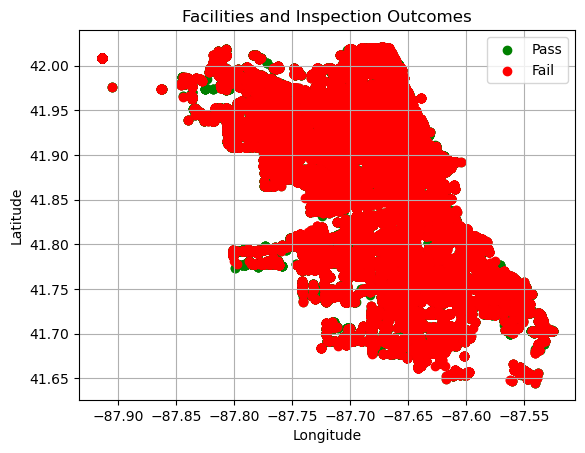

In [12]:


# Assuming your DataFrame is named df
# Step 1: Filter rows for 'Pass' and 'Fail' outcomes
pass_df = df[df['Results'] == 'Pass']
fail_df = df[df['Results'] == 'Fail']

# Step 2: Create a scatter plot for 'Pass' outcomes
plt.scatter(pass_df['Longitude'], pass_df['Latitude'], color='green', label='Pass')

# Step 3: Create a scatter plot for 'Fail' outcomes
plt.scatter(fail_df['Longitude'], fail_df['Latitude'], color='red', label='Fail')

# Step 4: Customize the plot
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Facilities and Inspection Outcomes')
plt.legend()
plt.grid(True)

# Step 5: Show the plot
plt.show()

In [26]:
facility_type_counts = df['Facility Type'].value_counts()

# Step 2: Filter out facility types with only one inspection
facility_types_with_multiple_inspections = facility_type_counts[facility_type_counts > 500].index

# Step 3: Create a new DataFrame with the filtered data
df = df[df['Facility Type'].isin(facility_types_with_multiple_inspections)]

In [27]:
facility_type_counts = df['Facility Type'].value_counts()
print(facility_type_counts)

Restaurant                         128026
Grocery Store                       23203
School                              13559
Children's Services Facility         3794
Bakery                               2800
Daycare Above and Under 2 Years      2571
Daycare (2 - 6 Years)                2107
Long Term Care                       1554
Catering                             1024
Liquor                                618
Mobile Food Preparer                  541
Golden Diner                          533
Hospital                              509
Name: Facility Type, dtype: int64


In [29]:
df = df[df['Results'].isin(['Pass', 'Fail'])]

Text(0.5, 1.0, 'Results Destribution')

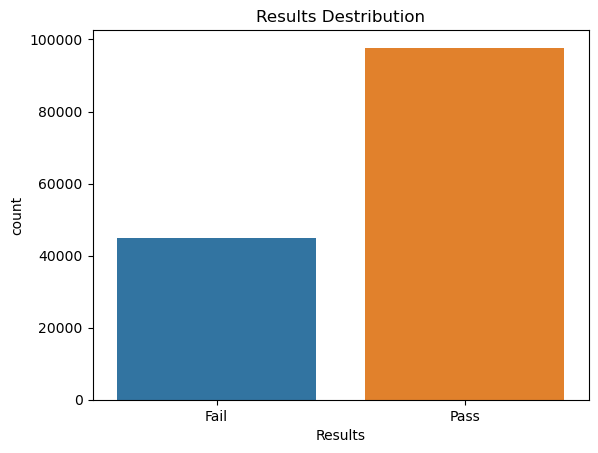

In [30]:
sns.countplot(df, x='Results')
plt.title("Results Destribution")

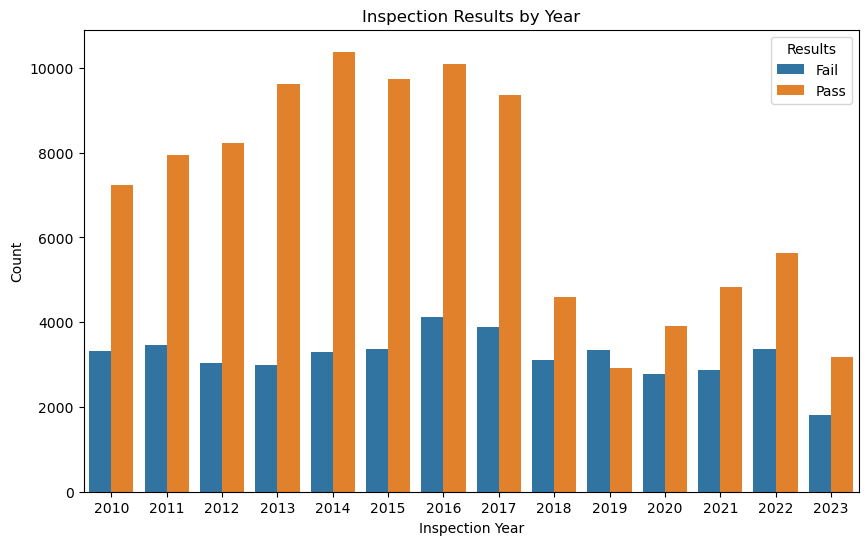

In [31]:
df['Inspection Date'] = pd.to_datetime(df['Inspection Date'])

# Extract the month and year from 'Inspection Date'
df['Inspection Month'] = df['Inspection Date'].dt.month
df['Inspection Year'] = df['Inspection Date'].dt.year

# Now you can proceed with visualization for Inspection Results by Inspection Year
plt.figure(figsize=(10, 6))
sns.countplot(x='Inspection Year', hue='Results', data=df)
plt.title('Inspection Results by Year')
plt.xlabel('Inspection Year')
plt.ylabel('Count')
plt.legend(title='Results', loc='upper right')
plt.show()

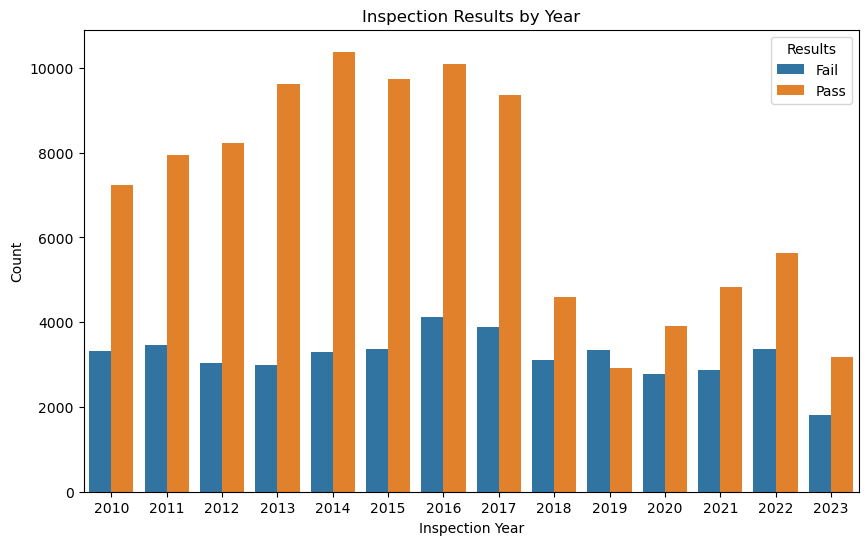

In [32]:
df['Inspection Date'] = pd.to_datetime(df['Inspection Date'])

# Extract the month and year from 'Inspection Date'
df['Inspection Month'] = df['Inspection Date'].dt.month
df['Inspection Year'] = df['Inspection Date'].dt.year

# Now you can proceed with visualization for Inspection Results by Inspection Year
plt.figure(figsize=(10, 6))
sns.countplot(x='Inspection Year', hue='Results', data=df)
plt.title('Inspection Results by Year')
plt.xlabel('Inspection Year')
plt.ylabel('Count')
plt.legend(title='Results', loc='upper right')
plt.show()

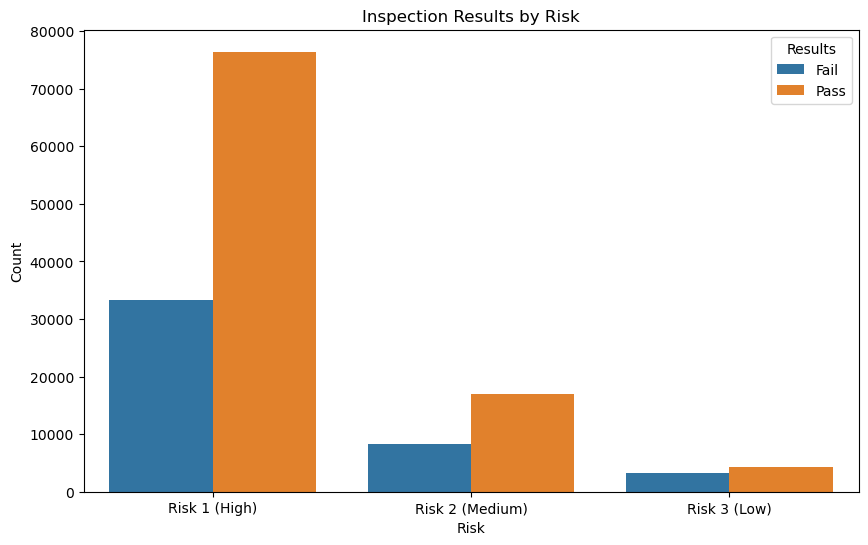

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Risk', hue='Results', data=df)
plt.title('Inspection Results by Risk')
plt.xlabel('Risk')
plt.ylabel('Count')
plt.legend(title='Results', loc='upper right')
plt.show()

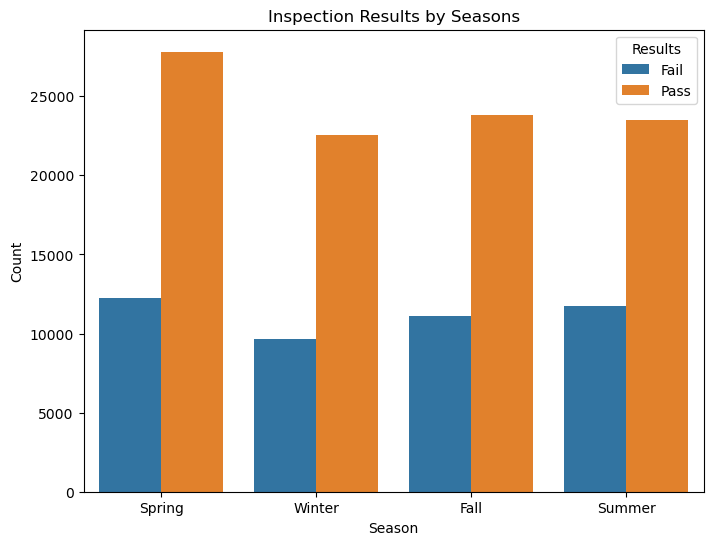

In [34]:
df['Inspection Date'] = pd.to_datetime(df['Inspection Date'])

# Extract the month from 'Inspection Date' to determine the season
df['Season'] = df['Inspection Date'].dt.month.apply(lambda x: 'Winter' if x in [12, 1, 2]
                                                      else 'Spring' if x in [3, 4, 5]
                                                      else 'Summer' if x in [6, 7, 8]
                                                      else 'Fall')

# Data Visualization

# Create count plots for Inspection Results by Seasons
plt.figure(figsize=(8, 6))
sns.countplot(x='Season', hue='Results', data=df)
plt.title('Inspection Results by Seasons')
plt.xlabel('Season')
plt.ylabel('Count')
plt.legend(title='Results', loc='upper right')
plt.show()

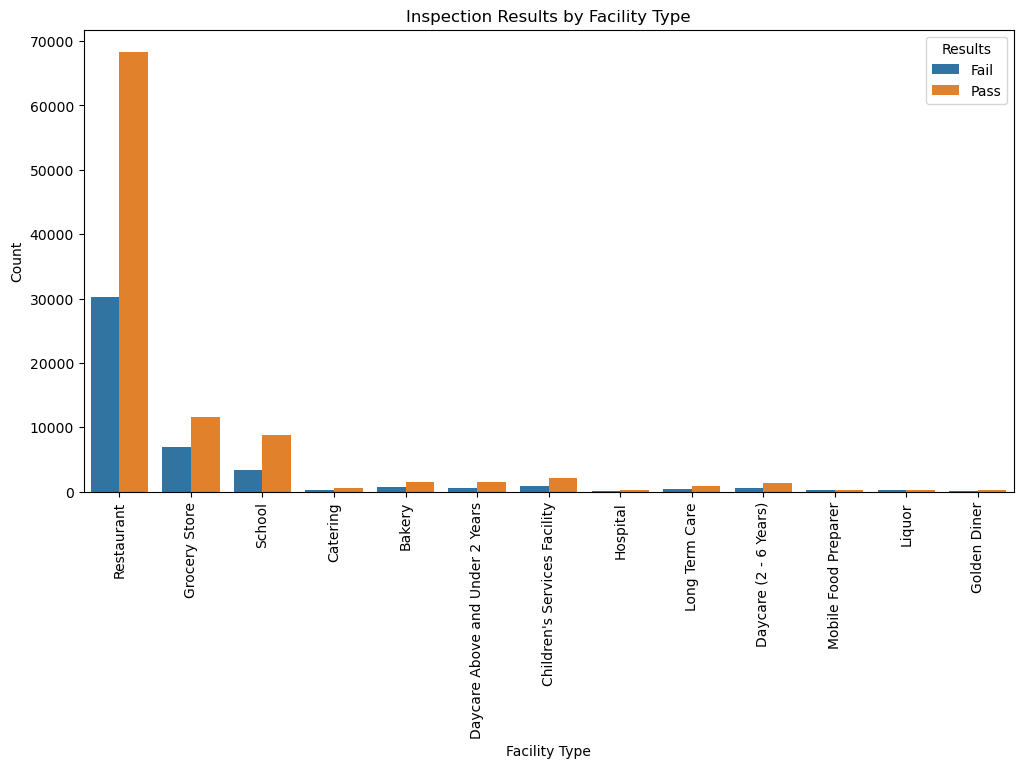

In [35]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Facility Type', hue='Results', data=df)
plt.title('Inspection Results by Facility Type')
plt.xlabel('Facility Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Results', loc='upper right')
plt.show()

In [39]:
risk_encoding = pd.get_dummies(df['Risk'], prefix='Risk')

df_encoded = pd.concat([df, risk_encoding], axis=1)

df_encoded.drop('Risk', axis=1, inplace=True)

df=df_encoded

In [40]:
df.head()

,DBA Name,Facility Type,Address,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location,Inspection Month,Inspection Year,Season,Risk_Risk 1 (High),Risk_Risk 2 (Medium),Risk_Risk 3 (Low)
30,MONTEALBAN,Restaurant,6012 W FULLERTON AVE,60639.0,2022-05-19,Canvass,Fail,5. PROCEDURES FOR RESPONDING TO VOMITING AND D...,41.923926,-87.776327,"(41.923926483609236, -87.77632683025247)",5,2022,Spring,1,0,0
45,MANA,Grocery Store,434 E 71ST ST,60619.0,2022-04-13,Complaint,Fail,2. CITY OF CHICAGO FOOD SERVICE SANITATION CER...,41.765844,-87.613915,"(41.76584421474714, -87.61391496525177)",4,2022,Spring,0,1,0
54,UNION LEAGUE CLUB,Restaurant,65 W JACKSON BLVD,60604.0,2022-03-11,Canvass,Fail,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...,41.878046,-87.630137,"(41.878045653481664, -87.6301367989615)",3,2022,Spring,1,0,0
70,INTERCONTINENTAL HOTEL CHICAGO,Restaurant,505 N MICHIGAN AVE,60611.0,2022-02-01,Canvass,Pass,32. VARIANCE OBTAINED FOR SPECIALIZED PROCESSI...,41.891121,-87.623989,"(41.891120593048875, -87.62398870432278)",2,2022,Winter,0,1,0
80,RESTAURANT EL ASADOR II,Restaurant,4117 W 47TH ST,60632.0,2022-01-19,Complaint Re-Inspection,Fail,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...,41.807721,-87.726825,"(41.80772111499567, -87.72682517366316)",1,2022,Winter,1,0,0


In [41]:
df['Violation_Descriptions'] = df['Violations'].str.split(';').str[0]
df['Violation_Comments'] = df['Violations'].str.split(';').str[1]

# Step 2: Drop the original 'Violations' column, as it is no longer needed
#df.drop('Violations', axis=1, inplace=True)

In [43]:
df.head()

,DBA Name,Facility Type,Address,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location,Inspection Month,Inspection Year,Season,Risk_Risk 1 (High),Risk_Risk 2 (Medium),Risk_Risk 3 (Low),Violation_Descriptions,Violation_Comments
30,MONTEALBAN,Restaurant,6012 W FULLERTON AVE,60639.0,2022-05-19,Canvass,Fail,5. PROCEDURES FOR RESPONDING TO VOMITING AND D...,41.923926,-87.776327,"(41.923926483609236, -87.77632683025247)",5,2022,Spring,1,0,0,5. PROCEDURES FOR RESPONDING TO VOMITING AND D...,ADEQUATE EQUIPMENT FOR TEMPERATURE CONTROL - ...
45,MANA,Grocery Store,434 E 71ST ST,60619.0,2022-04-13,Complaint,Fail,2. CITY OF CHICAGO FOOD SERVICE SANITATION CER...,41.765844,-87.613915,"(41.76584421474714, -87.61391496525177)",4,2022,Spring,0,1,0,2. CITY OF CHICAGO FOOD SERVICE SANITATION CER...,"KNOWLEDGE, RESPONSIBILITIES AND REPORTING - C..."
54,UNION LEAGUE CLUB,Restaurant,65 W JACKSON BLVD,60604.0,2022-03-11,Canvass,Fail,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...,41.878046,-87.630137,"(41.878045653481664, -87.6301367989615)",3,2022,Spring,1,0,0,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...,ADEQUATE EQUIPMENT FOR TEMPERATURE CONTROL - ...
70,INTERCONTINENTAL HOTEL CHICAGO,Restaurant,505 N MICHIGAN AVE,60611.0,2022-02-01,Canvass,Pass,32. VARIANCE OBTAINED FOR SPECIALIZED PROCESSI...,41.891121,-87.623989,"(41.891120593048875, -87.62398870432278)",2,2022,Winter,0,1,0,32. VARIANCE OBTAINED FOR SPECIALIZED PROCESSI...,NaN
80,RESTAURANT EL ASADOR II,Restaurant,4117 W 47TH ST,60632.0,2022-01-19,Complaint Re-Inspection,Fail,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...,41.807721,-87.726825,"(41.80772111499567, -87.72682517366316)",1,2022,Winter,1,0,0,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...,ORIGINAL CONTAINER - Comments: Violation Code...


In [52]:
df.columns

Index(['DBA Name', 'Facility Type', 'Address', 'Zip', 'Inspection Date',
       'Inspection Type', 'Results', 'Violations', 'Latitude', 'Longitude',
       'Location', 'Inspection Month', 'Inspection Year', 'Season',
       'Risk_Risk 1 (High)', 'Risk_Risk 2 (Medium)', 'Risk_Risk 3 (Low)',
       'Violation_Descriptions', 'Violation_Comments'],
      dtype='object')

In [53]:
features=['DBA Name', 'Facility Type', 'Address', 'Zip', 'Inspection Date',
       'Inspection Type', 'Violations', 'Latitude', 'Longitude',
       'Location', 'Inspection Month', 'Inspection Year', 'Season',
       'Risk_Risk 1 (High)', 'Risk_Risk 2 (Medium)', 'Risk_Risk 3 (Low)',
       'Violation_Descriptions', 'Violation_Comments']
target=['Results']

In [54]:
X=df[features]
y=df[target]

In [55]:
from sklearn.model_selection import train_test_split, GridSearchCV


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y)

In [59]:
df=df.drop(columns=['DBA Name', 'Inspection Date'])

In [60]:
from sklearn.linear_model import LogisticRegression

Index(['Facility Type', 'Address', 'Zip', 'Inspection Type', 'Results',
       'Violations', 'Latitude', 'Longitude', 'Location', 'Inspection Month',
       'Inspection Year', 'Season', 'Risk_Risk 1 (High)',
       'Risk_Risk 2 (Medium)', 'Risk_Risk 3 (Low)', 'Violation_Descriptions',
       'Violation_Comments'],
      dtype='object')